In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.
/home/komalumrethe/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/komalumrethe/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/komalumrethe/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/komalumrethe/anaconda3/lib/pytho

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    # plt.show()
    # fig.canvas.draw()
    plt.show()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Softmax classifier

In [12]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [13]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> MLP + ReLU + Adam: 2 Hidden Layers and without Dropout and Batch Normalization

In [14]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_relu.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_2 (Dense)              (None, 52)                18980     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________
None

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2553 - accuracy: 0.9239 - val_loss: 0.1404 - val_accuracy: 0.9576
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0980 - accuracy: 0.9707 - val_loss: 0.1119 - val_accuracy: 0.9661
Epoch 3/20
60000/60000 [====

Test score: 0.09574766628526103
Test accuracy: 0.979200005531311


<IPython.core.display.Javascript object>


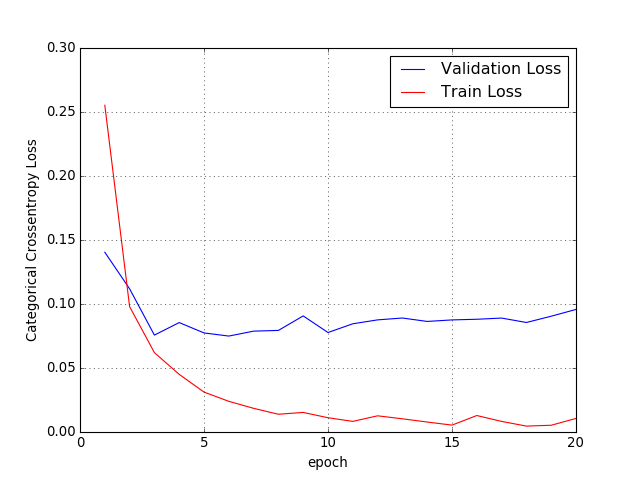

In [15]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


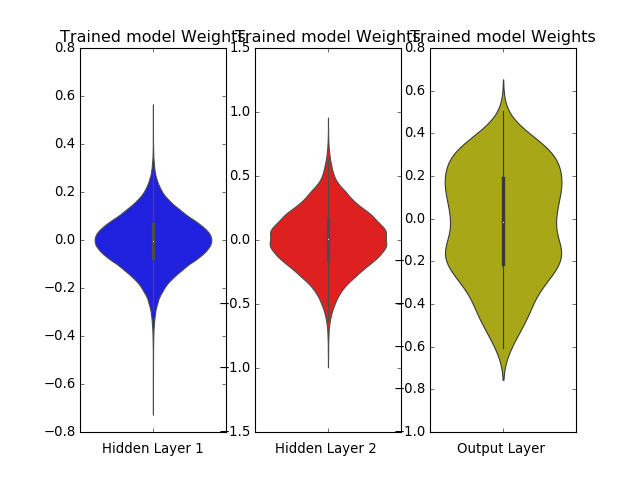

In [16]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Batch-Norm on 2 hidden Layers + AdamOptimizer

In [17]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dense_5 (Dense)              (None, 52)                18980     
_________________________________________________________________
batch_normalization_2 (Batch (None, 52)                208       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                530       
Total params: 306,914
Trainable params: 306,082
Non-trainable params: 832
_________________________________________________________________


In [18]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2564 - accuracy: 0.9274 - val_loss: 0.1154 - val_accuracy: 0.9668
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0888 - accuracy: 0.9743 - val_loss: 0.0926 - val_accuracy: 0.9719
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0560 - accuracy: 0.9835 - val_loss: 0.0806 - val_accuracy: 0.9741
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0829 - val_accuracy: 0.9733
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0819 - val_accuracy: 0.9741
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0815 - val_accuracy: 0.9748
Epoch 7/20
60000/60000 [==============================] - 3s 48us/st

Test score: 0.0872070386303676
Test accuracy: 0.9796000123023987


<IPython.core.display.Javascript object>


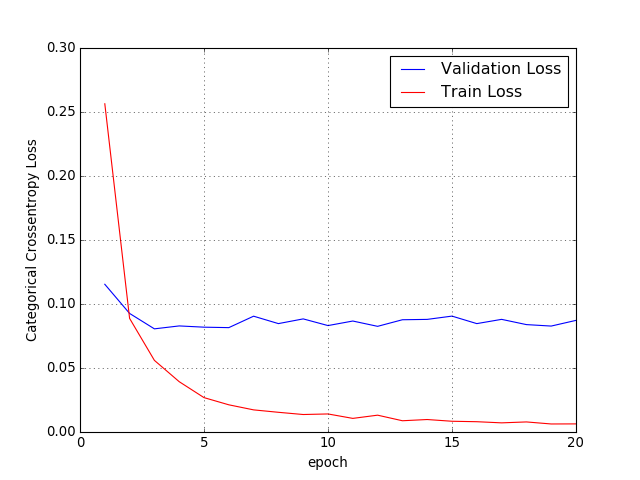

In [19]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


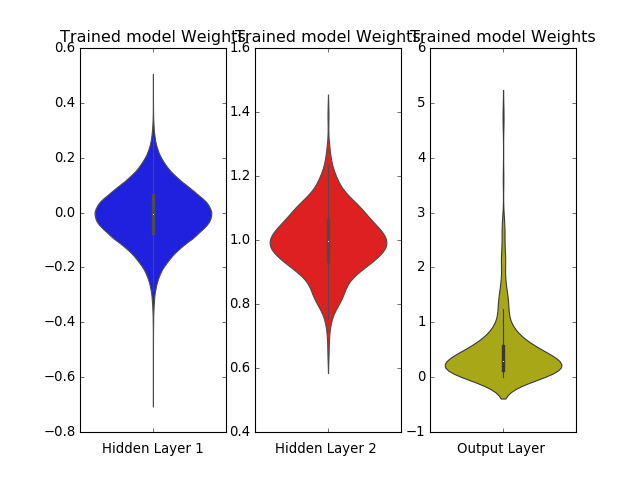

In [20]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Dropout (dropout rate = 0.5) on 2 hidden layers + AdamOptimizer

In [21]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 52)                18980     
_________________________________________________________________
batch_normalization_4 (Batch (None, 52)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [22]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.6613 - accuracy: 0.7983 - val_loss: 0.1981 - val_accuracy: 0.9418
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3129 - accuracy: 0.9081 - val_loss: 0.1463 - val_accuracy: 0.9566
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2397 - accuracy: 0.9315 - val_loss: 0.1147 - val_accuracy: 0.9666
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2024 - accuracy: 0.9421 - val_loss: 0.1061 - val_accuracy: 0.9666
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1766 - accuracy: 0.9488 - val_loss: 0.0959 - val_accuracy: 0.9709
Epoch 6/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1585 - accuracy: 0.9534 - val_loss: 0.0912 - val_accuracy: 0.9731
Epoch 7/20
60000/60000 [==============================] - 3s 54us/st

In [ ]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## MLP + Dropout (dropout rate = 0.25) on 2 hidden layers + AdamOptimizer

In [24]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_7 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_5 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_8 (Batch (None, 52)                208       
_________________________________________________________________
dropout_6 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [25]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3875 - accuracy: 0.8858 - val_loss: 0.1491 - val_accuracy: 0.9571
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1723 - accuracy: 0.9498 - val_loss: 0.1036 - val_accuracy: 0.9681
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1295 - accuracy: 0.9614 - val_loss: 0.0851 - val_accuracy: 0.9737
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1073 - accuracy: 0.9673 - val_loss: 0.0894 - val_accuracy: 0.9728
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0900 - accuracy: 0.9717 - val_loss: 0.0730 - val_accuracy: 0.9784
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0771 - accuracy: 0.9762 - val_loss: 0.0706 - val_accuracy: 0.9771
Epoch 7/20
60000/60000 [==============================] - 3s 53us/st

## MLP + Dropout (dropout rate = 0.75) on 2 hidden layers + AdamOptimizer

In [27]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_9 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_7 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_10 (Batc (None, 52)                208       
_________________________________________________________________
dropout_8 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [28]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4016 - accuracy: 0.8825 - val_loss: 0.1430 - val_accuracy: 0.9583
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1653 - accuracy: 0.9513 - val_loss: 0.1010 - val_accuracy: 0.9689
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1259 - accuracy: 0.9630 - val_loss: 0.0912 - val_accuracy: 0.9723
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1010 - accuracy: 0.9685 - val_loss: 0.0823 - val_accuracy: 0.9741
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0858 - accuracy: 0.9734 - val_loss: 0.0733 - val_accuracy: 0.9782
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0745 - accuracy: 0.9769 - val_loss: 0.0722 - val_accuracy: 0.9794
Epoch 7/20
60000/60000 [==============================] - 3s 55us/st

Test score: 0.061442252652550815
Test accuracy: 0.9835000038146973


<IPython.core.display.Javascript object>


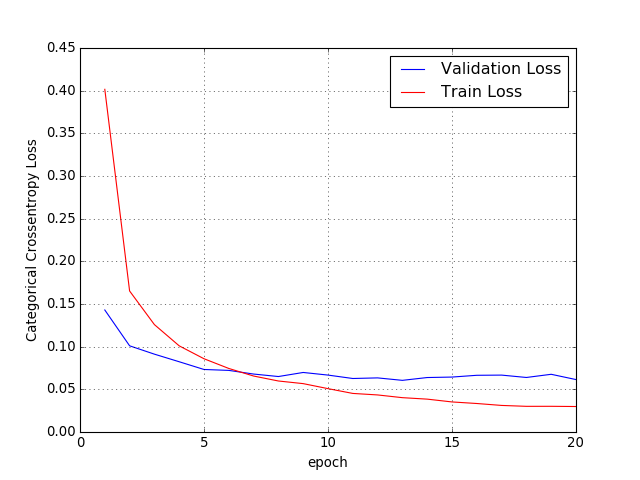

In [29]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


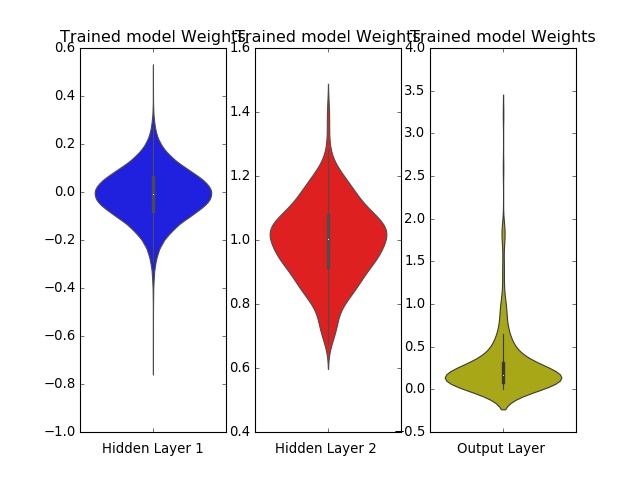

In [30]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 3 hidden layers without Dropout and Batch Normalisation

In [31]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_21 (Dense)             (None, 52)                6708      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                530       
Total params: 339,698
Trainable params: 339,698
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2693 - accuracy: 0.9198 - val_loss: 0.1260 - val_accuracy: 0.9616
Epoch 2/20
60000/60000 [====================

Test score: 0.11258738235081656
Test accuracy: 0.9790999889373779


<IPython.core.display.Javascript object>


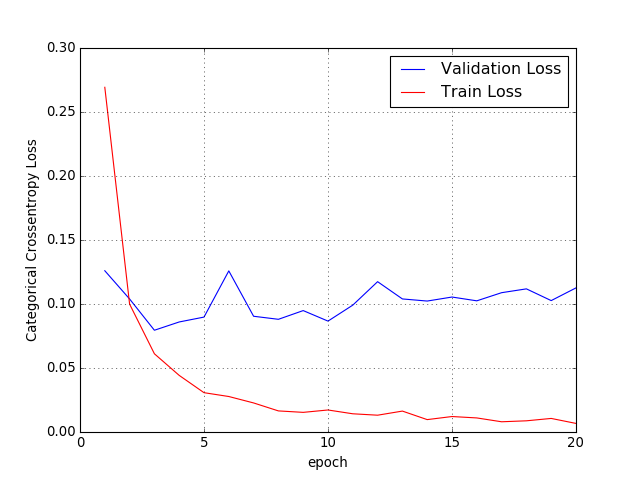

In [32]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


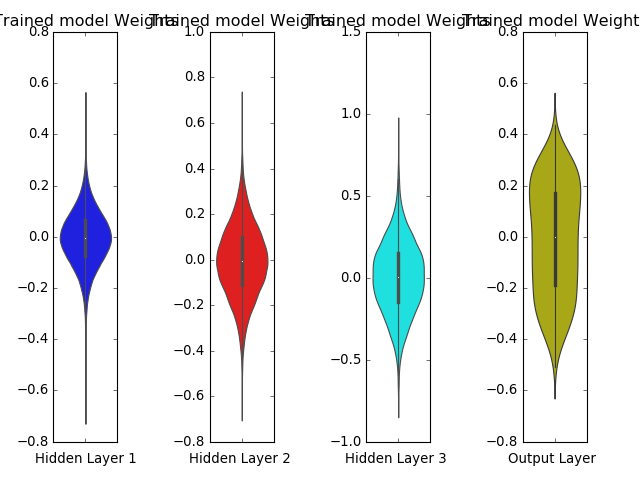

In [35]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='cyan')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.tight_layout()

## MLP + ReLU + ADAM with 3 hidden layers with Batch Normalisation

In [36]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_11 (Batc (None, 364)               1456      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_25 (Dense)             (None, 52)                6708      
_________________________________________________________________
batch_normalization_13 (Batc (None, 52)                208       
_________________________________________________________________
dense_26 (Dense)             (None, 10)               

In [37]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2511 - accuracy: 0.9278 - val_loss: 0.1079 - val_accuracy: 0.9677
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0846 - accuracy: 0.9751 - val_loss: 0.0883 - val_accuracy: 0.9731
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0844 - val_accuracy: 0.9727
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0739 - val_accuracy: 0.9762
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0801 - val_accuracy: 0.9765
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 7/20
60000/60000 [==============================] - 5s 80us/st

Test score: 0.08473182359161073
Test accuracy: 0.9789999723434448


<IPython.core.display.Javascript object>


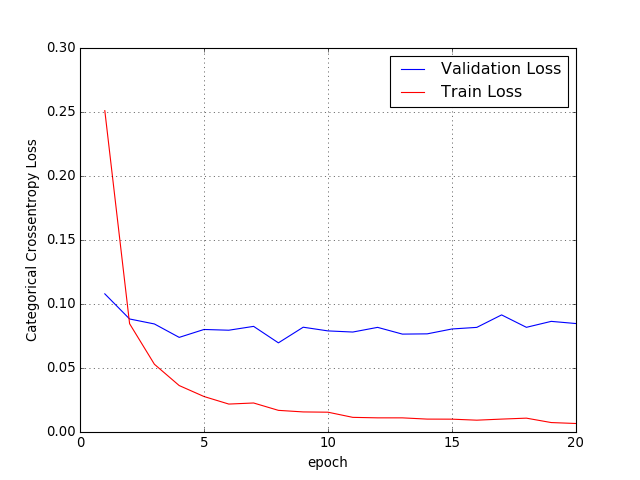

In [38]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


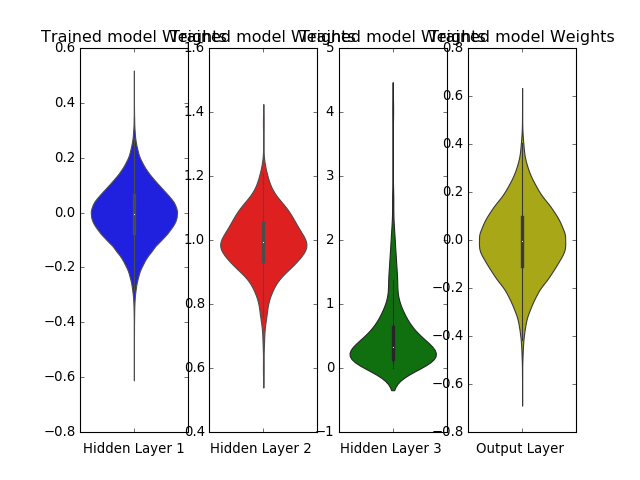

In [39]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 3 hidden layers with Dropout (dropout rate = 0.5)

In [40]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_14 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_9 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 52)               

In [41]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.9108 - accuracy: 0.7163 - val_loss: 0.2433 - val_accuracy: 0.9255
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.3957 - accuracy: 0.8870 - val_loss: 0.1669 - val_accuracy: 0.9494
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.2933 - accuracy: 0.9186 - val_loss: 0.1370 - val_accuracy: 0.9582
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2417 - accuracy: 0.9342 - val_loss: 0.1212 - val_accuracy: 0.9634
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2106 - accuracy: 0.9423 - val_loss: 0.1101 - val_accuracy: 0.9682
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1920 - accuracy: 0.9476 - val_loss: 0.0988 - val_accuracy: 0.9719
Epoch 7/20
60000/60000 [==============================] - 5s 92us/s

Test score: 0.07038851246719714
Test accuracy: 0.9825000166893005


<IPython.core.display.Javascript object>


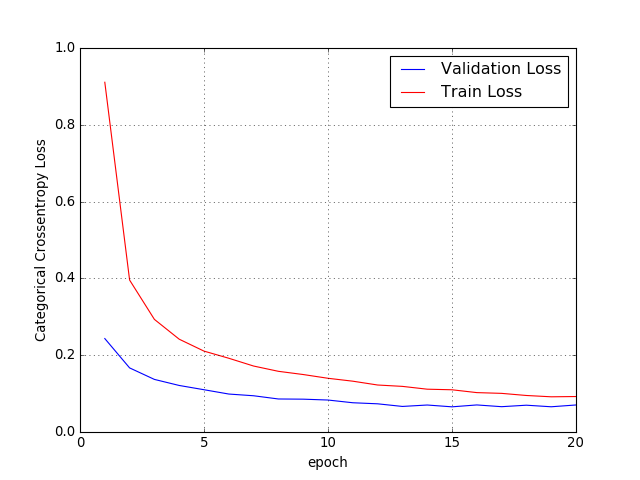

In [42]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


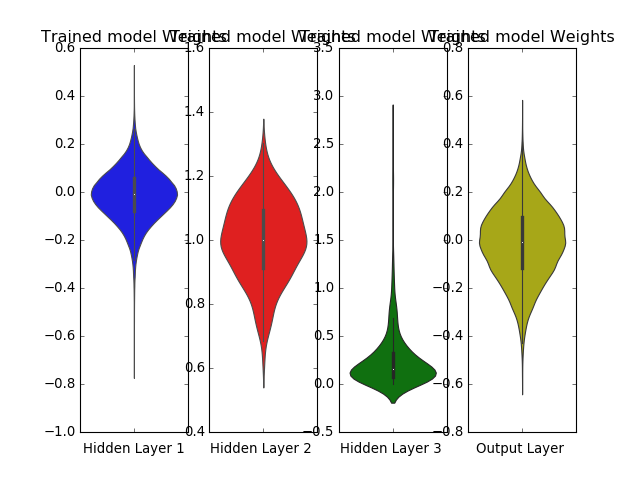

In [43]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 3 hidden layers with Dropout (dropout rate = 0.25)

In [48]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(128, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.196, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_23 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_18 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 52)              

In [49]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.4696 - accuracy: 0.8598 - val_loss: 0.1418 - val_accuracy: 0.9546
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1958 - accuracy: 0.9419 - val_loss: 0.1066 - val_accuracy: 0.9661
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1465 - accuracy: 0.9567 - val_loss: 0.0860 - val_accuracy: 0.9710
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1175 - accuracy: 0.9639 - val_loss: 0.0793 - val_accuracy: 0.9748
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0989 - accuracy: 0.9702 - val_loss: 0.0707 - val_accuracy: 0.9779
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0889 - accuracy: 0.9737 - val_loss: 0.0717 - val_accuracy: 0.9786
Epoch 7/20
60000/60000 [==============================] - 6s 10

Test score: 0.06377539714767481
Test accuracy: 0.9819999933242798


<IPython.core.display.Javascript object>


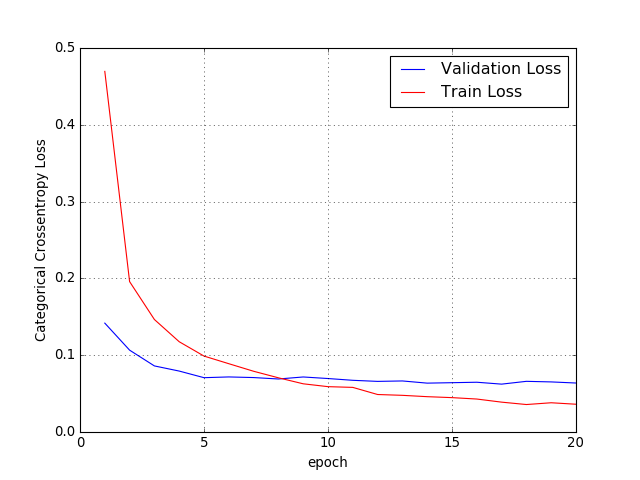

In [50]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


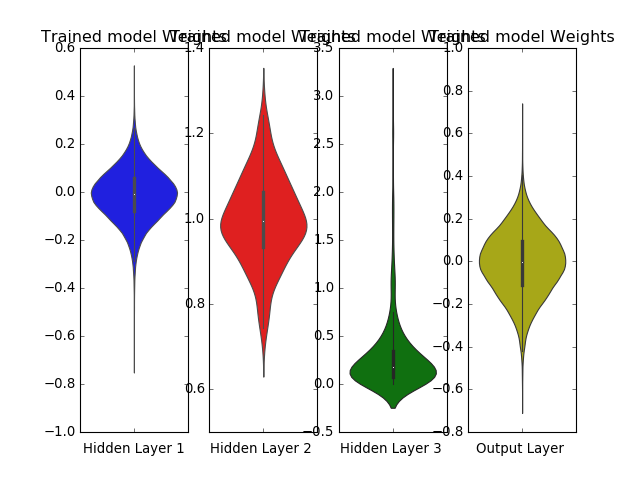

In [51]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 5 hidden layers without Dropout and Batch Normalisation

In [52]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_relu.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.354, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                170       
Total params: 343,494
Trainable params: 343,494
Non-trainable params: 0
_______________________________________________

Test score: 0.1060613916828221
Test accuracy: 0.9776999950408936


<IPython.core.display.Javascript object>


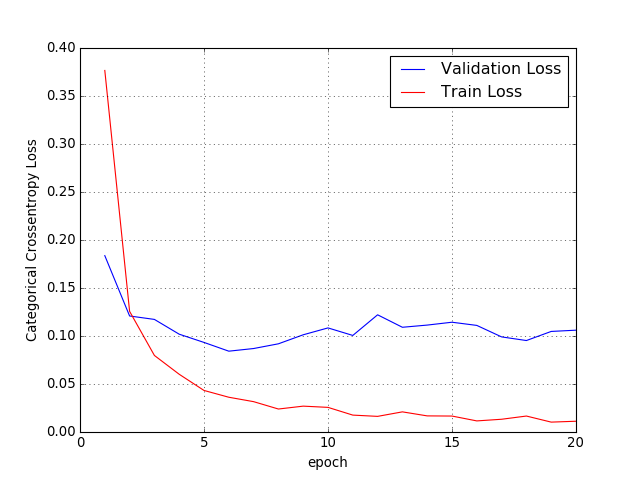

In [53]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


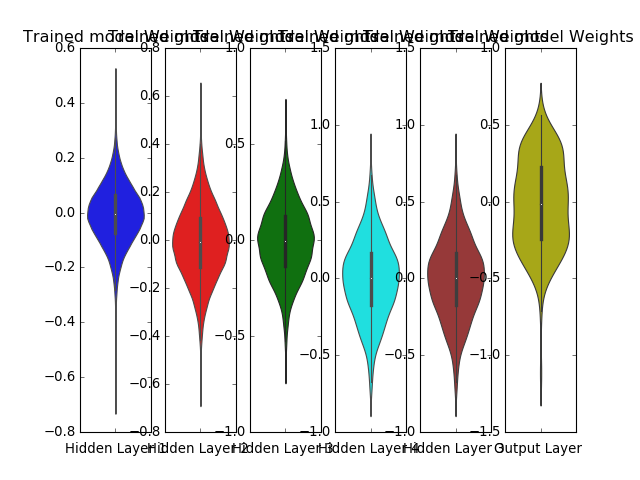

In [54]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='cyan')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='brown')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 5 hidden layers with Batch Normalisation

In [55]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.354, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_26 (Batc (None, 364)               1456      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_28 (Batc (None, 64)                256       
_________________________________________________________________
dense_52 (Dense)             (None, 32)              

In [56]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4110 - accuracy: 0.8947 - val_loss: 0.1524 - val_accuracy: 0.9563
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1170 - accuracy: 0.9677 - val_loss: 0.1063 - val_accuracy: 0.9708
Epoch 3/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0744 - accuracy: 0.9780 - val_loss: 0.0919 - val_accuracy: 0.9743
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0561 - accuracy: 0.9832 - val_loss: 0.0901 - val_accuracy: 0.9741
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.1002 - val_accuracy: 0.9725
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0868 - val_accuracy: 0.9762
Epoch 7/20
60000/60000 [==============================] - 6s 97us

Test score: 0.1060613916828221
Test accuracy: 0.9776999950408936


<IPython.core.display.Javascript object>


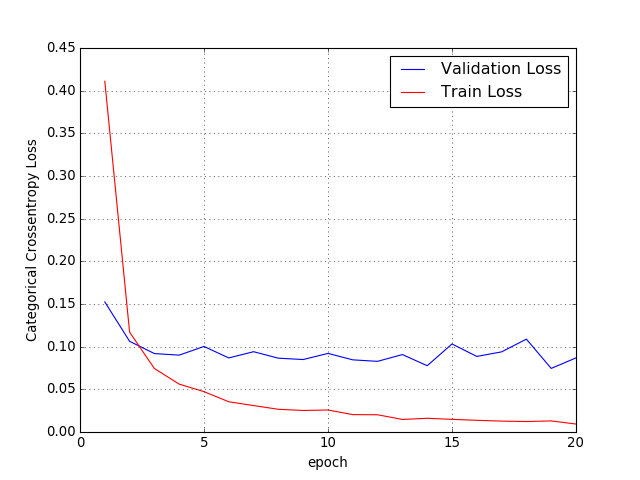

In [57]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


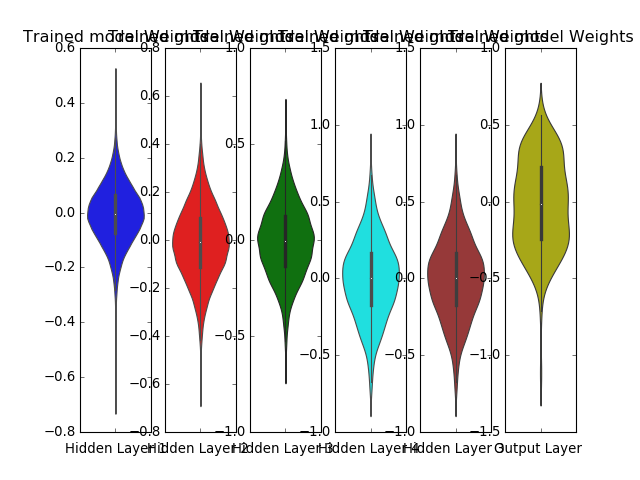

In [58]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='cyan')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='brown')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 5 hidden layers with Dropout (dropout rate = 0.5)

In [59]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.354, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_21 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               46720     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)              

In [60]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.7044 - accuracy: 0.1195 - val_loss: 2.3014 - val_accuracy: 0.1136
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.1709 - accuracy: 0.2078 - val_loss: 1.8698 - val_accuracy: 0.3667
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 1.8653 - accuracy: 0.3251 - val_loss: 1.5882 - val_accuracy: 0.4043
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 1.6584 - accuracy: 0.4065 - val_loss: 1.4147 - val_accuracy: 0.5350
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 1.4961 - accuracy: 0.4598 - val_loss: 1.2402 - val_accuracy: 0.5695
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 1.3807 - accuracy: 0.4925 - val_loss: 1.1266 - val_accuracy: 0.6056
Epoch 7/20
60000/60000 [==============================] - 5s 83us/st

Test score: 0.1060613916828221
Test accuracy: 0.9776999950408936


<IPython.core.display.Javascript object>


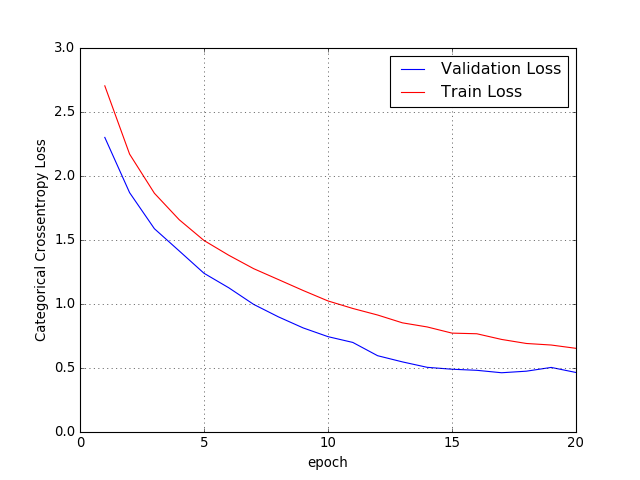

In [61]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


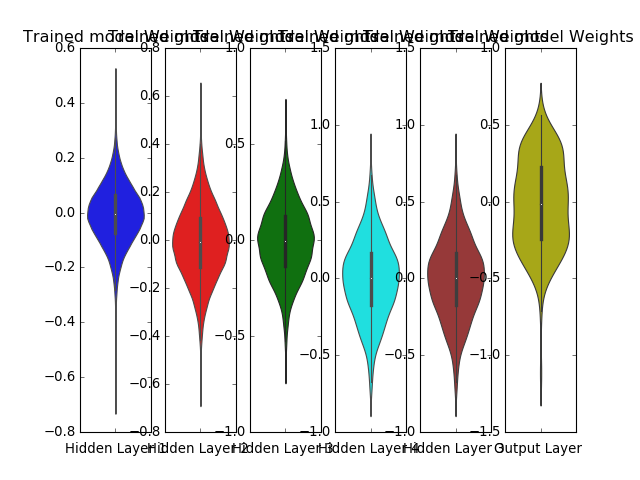

In [62]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='cyan')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='brown')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM with 5 hidden layers with Dropout (dropout rate = 0.25)

In [63]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_drop.add(Dropout(0.25))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop.add(Dropout(0.25))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(Dropout(0.25))

model_drop.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop.add(Dropout(0.25))

model_drop.add(Dense(16, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.354, seed=None)) )
model_drop.add(Dropout(0.25))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_26 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               46720     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)              

In [64]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
                         validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/step - loss: 1.4585 - accuracy: 0.5030 - val_loss: 0.3698 - val_accuracy: 0.9152
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.5783 - accuracy: 0.8296 - val_loss: 0.2133 - val_accuracy: 0.9456
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4104 - accuracy: 0.8878 - val_loss: 0.1751 - val_accuracy: 0.9563
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3233 - accuracy: 0.9148 - val_loss: 0.1400 - val_accuracy: 0.9671
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2796 - accuracy: 0.9281 - val_loss: 0.1321 - val_accuracy: 0.9671
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2445 - accuracy: 0.9377 - val_loss: 0.1359 - val_accuracy: 0.9683
Epoch 7/20
60000/60000 [==============================] - 5s 81us/s

Test score: 0.1060613916828221
Test accuracy: 0.9776999950408936


/home/komalumrethe/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


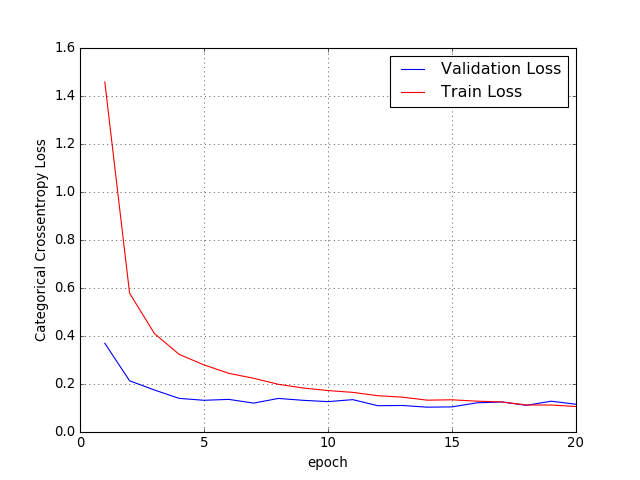

In [65]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/home/komalumrethe/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


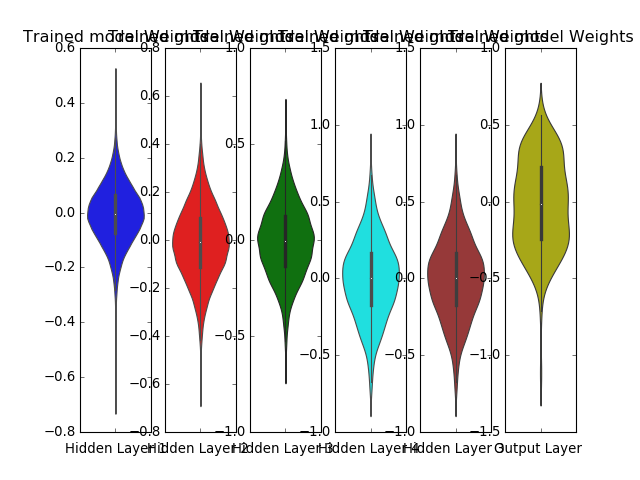

In [66]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='cyan')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='brown')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [67]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Architecture", "parameters", "Accuracy"]

x.add_row(["2 layer", "Without Batch Normalization and Dropout", 97.92])
x.add_row(["2 layer", "With Batch Normalization", 97.96])
x.add_row(["2 layer", "With Dropuot(dropout rate = 0.5)", 98.28])
x.add_row(["2 layer", "With Dropuot(dropout rate = 0.25)", 98.29])
x.add_row(["2 layer", "With Dropuot(dropout rate = 0.75)", 98.35])

x.add_row(["3 layer", "Without Batch Normalization and Dropout", 97.90])
x.add_row(["3 layer", "With Batch Normalization", 97.89])
x.add_row(["3 layer", "With Dropuot(dropout rate = 0.5)", 98.25])
x.add_row(["3 layer", "With Dropuot(dropout rate = 0.25)", 98.19])

x.add_row(["5 layer", "Without Batch Normalization and Dropout", 97.7699])
x.add_row(["5 layer", "With Batch Normalization", 97.7699])
x.add_row(["5 layer", "With Dropuot(dropout rate = 0.5)", 97.7699])
x.add_row(["5 layer", "With Dropuot(dropout rate = 0.25)", 97.7699])

print(x)

+--------------+-----------------------------------------+----------+
| Architecture |                parameters               | Accuracy |
+--------------+-----------------------------------------+----------+
|   2 layer    | Without Batch Normalization and Dropout |  97.92   |
|   2 layer    |         With Batch Normalization        |  97.96   |
|   2 layer    |     With Dropuot(dropout rate = 0.5)    |  98.28   |
|   2 layer    |    With Dropuot(dropout rate = 0.25)    |  98.29   |
|   2 layer    |    With Dropuot(dropout rate = 0.75)    |  98.35   |
|   3 layer    | Without Batch Normalization and Dropout |   97.9   |
|   3 layer    |         With Batch Normalization        |  97.89   |
|   3 layer    |     With Dropuot(dropout rate = 0.5)    |  98.25   |
|   3 layer    |    With Dropuot(dropout rate = 0.25)    |  98.19   |
|   5 layer    | Without Batch Normalization and Dropout | 97.7699  |
|   5 layer    |         With Batch Normalization        | 97.7699  |
|   5 layer    |    

## Procedure Followed

- Flattened the 28*28 dimensional MNIST data to 784
- Normalized the data
- Used a softmax classifier of output dimensions = 10
- Created multiple models in Keras with various parameter combinations like activation function = 'relu', optimizer = 'Adam', with/without dropout of different rates and with/without Batch normalization
- Plotted the epoch vs Train/Test loss of each model
- Plotted the weights of each model